# Analysis of emotion in comments

## Part 1, the cleaning of data and testing of instrument

In [57]:
## list of imports
import pandas as pd
import seaborn as sns

In [58]:
## dataframe
df = pd.read_csv('Musical_instruments_reviews.csv')
df.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [59]:
## to see the counts
product_count = df['asin'].value_counts()
print(product_count)

B003VWJ2K8    163
B0002E1G5C    143
B0002F7K7Y    116
B003VWKPHC    114
B0002H0A3S     93
             ... 
B004GYM7IE      5
B000LPUV8K      5
B000LAT0AK      5
B004HJ9COU      5
1384719342      5
Name: asin, Length: 900, dtype: int64


<Axes: xlabel='asin', ylabel='Count'>

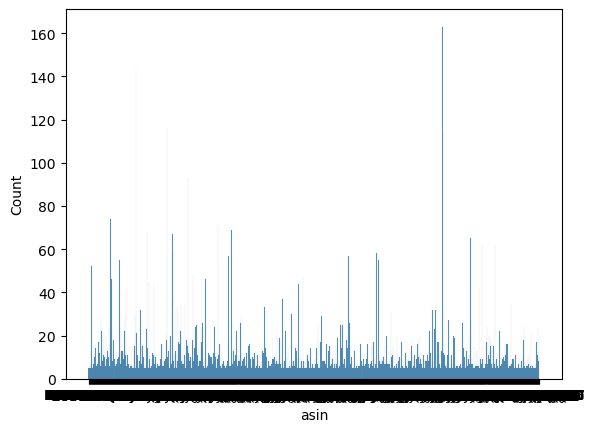

In [10]:
## to see the data visualy 
sns.histplot(data=df, x='asin')

#### data shows that there are 5 main products, so thats the data that we will use

In [85]:
## table for product B003VWJ2K8

product_1 = df[df['asin'] == 'B003VWJ2K8'].copy()
product_2 = df[df['asin'] == 'B0002E1G5C'].copy()
product_3 = df[df['asin'] == 'B0002F7K7Y'].copy()
product_4 = df[df['asin'] == 'B003VWKPHC'].copy()
product_5 = df[df['asin'] == 'B0002H0A3S'].copy()

#### emotion reader for python

In [26]:
!! pip install vaderSentiment

['Collecting vaderSentiment',
 '  Downloading vaderSentiment-3.3.2-py2.py3-none-any.whl (125 kB)',
 '     ---------------------------------------- 0.0/126.0 kB ? eta -:--:--',
 '     --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--',
 '     --------- --------------------------- 30.7/126.0 kB 330.3 kB/s eta 0:00:01',
 '     ------------ ------------------------ 41.0/126.0 kB 245.8 kB/s eta 0:00:01',
 '     --------------------- --------------- 71.7/126.0 kB 328.6 kB/s eta 0:00:01',
 '     ------------------------------------ 126.0/126.0 kB 530.8 kB/s eta 0:00:00',
 'Requirement already satisfied: requests in c:\\users\\62817\\anaconda3\\lib\\site-packages (from vaderSentiment) (2.31.0)',
 'Requirement already satisfied: charset-normalizer<4,>=2 in c:\\users\\62817\\anaconda3\\lib\\site-packages (from requests->vaderSentiment) (2.0.4)',
 'Requirement already satisfied: idna<4,>=2.5 in c:\\users\\62817\\anaconda3\\lib\\site-packages (from requests->vaderSentiment) (3.4

In [38]:
# Import the necessary libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create an instance of the SentimentIntensityAnalyzer class
analyzer = SentimentIntensityAnalyzer()

# Define the text to analyze
text = "fuck this piece of shit, i hate it"

# Analyze the sentiment of the text
scores = analyzer.polarity_scores(text)

# Print the sentiment scores
print(scores)


{'neg': 0.684, 'neu': 0.316, 'pos': 0.0, 'compound': -0.8957}


In [40]:
## only get the compound scores
scores['compound']

-0.8957

## Part 2, the emotion reading in table

#### Reading the emotion

In [65]:
## the emotional function 
def emotion(text):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    return scores['compound'] 

In [88]:
product_1['emotion'] = product_1['reviewText'].apply(emotion)
product_2['emotion'] = product_2['reviewText'].apply(emotion)
product_3['emotion'] = product_3['reviewText'].apply(emotion)
product_4['emotion'] = product_4['reviewText'].apply(emotion)
product_5['emotion'] = product_5['reviewText'].apply(emotion)

In [91]:
## final result example
product_1.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,emotion
8107,A3MONHA5DCPPLZ,B003VWJ2K8,3rdtimer,"[0, 0]",It works but shut it down as soon as you are f...,3.0,Eats batteries.,1390003200,"01 18, 2014",-0.1154
8108,ASYHYW0USZVN6,B003VWJ2K8,aashish,"[0, 0]",very awesome item. really useful for tuning. h...,5.0,awesome item,1357948800,"01 12, 2013",0.9175
8109,A1RSRUQVKB5EBO,B003VWJ2K8,A F&amp;T,"[1, 1]",My friend has commented on its bright color - ...,5.0,nice tuner for the $,1322438400,"11 28, 2011",0.9606
8110,A22Z554ZQ8NFPC,B003VWJ2K8,"AF ""Whigs""","[0, 0]",I have another cheap clip on tuner from guitar...,5.0,Wow! Great tuner!,1299196800,"03 4, 2011",0.9839
8111,A2SBZZ1HSR7WSP,B003VWJ2K8,A. Mayse,"[0, 0]",the snark series of tuners are the best small ...,5.0,excellent tuner,1324166400,"12 18, 2011",0.7869


#### Visualizing the emotions

<Axes: xlabel='emotion', ylabel='Count'>

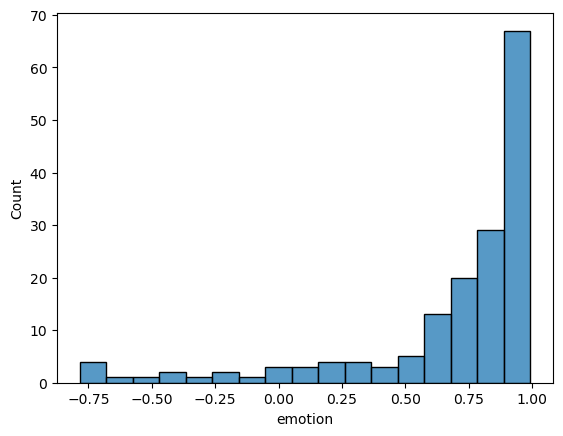

In [92]:
## histogram of product 1
sns.histplot(data=product_1, x='emotion')

<Axes: xlabel='emotion', ylabel='Count'>

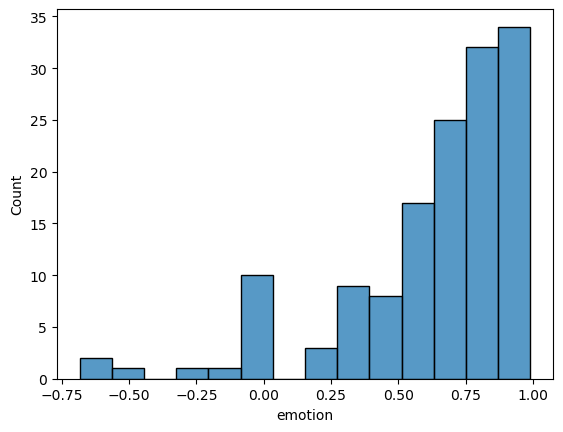

In [93]:
## histogram of product 2
sns.histplot(data=product_2, x='emotion')

<Axes: xlabel='emotion', ylabel='Count'>

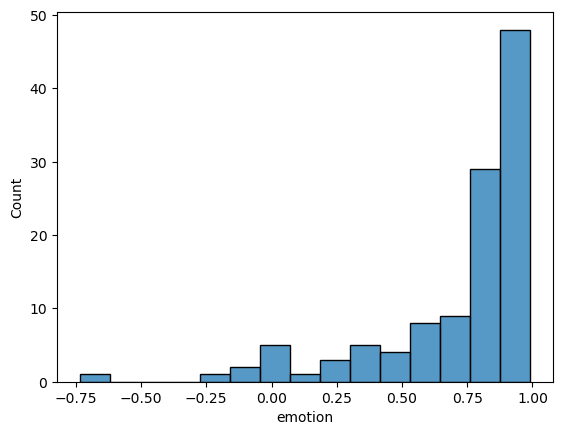

In [94]:
## histogram of product 3
sns.histplot(data=product_3, x='emotion')

<Axes: xlabel='emotion', ylabel='Count'>

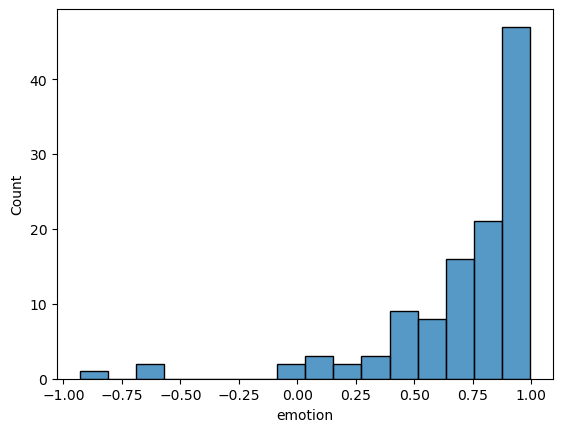

In [95]:
## histogram of product 4
sns.histplot(data=product_4, x='emotion')

<Axes: xlabel='emotion', ylabel='Count'>

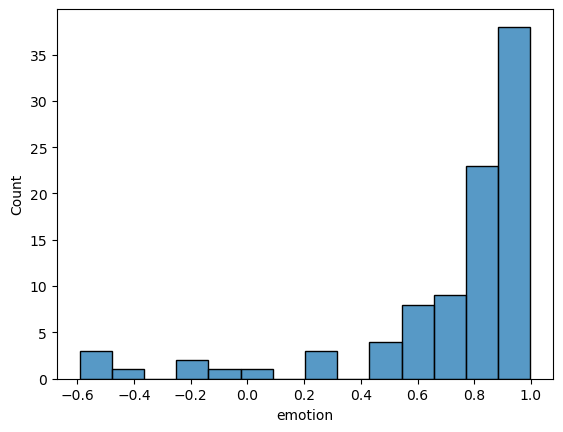

In [96]:
## histogram of product 5
sns.histplot(data=product_5, x='emotion')